In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats


boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url).reset_index()

boston_df.head()

,index,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4: Generate Descriptive Statistics and Visualizations

## Boxplot

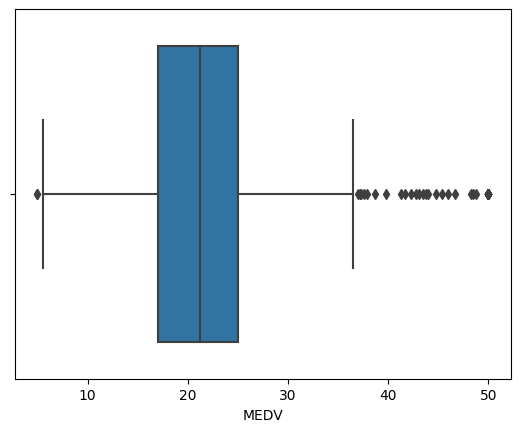

In [2]:
sns.boxplot(x='MEDV', data=boston_df)

plt.show()

## Bar plot

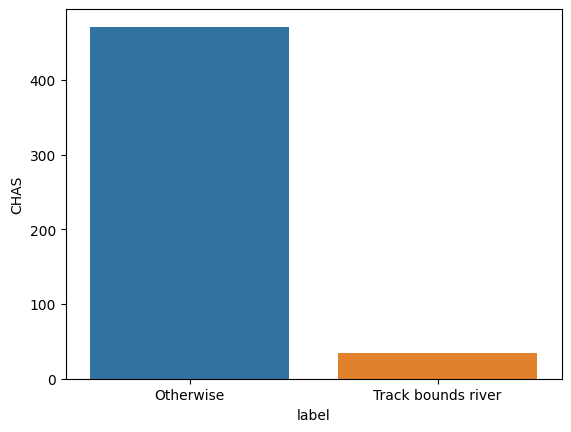

In [24]:
crv = boston_df['CHAS'].value_counts().reset_index()
crv['label'] = ['Otherwise','Track bounds river']

sns.barplot(y=crv.CHAS, x='label', data=crv)


plt.show()

## Boxplot

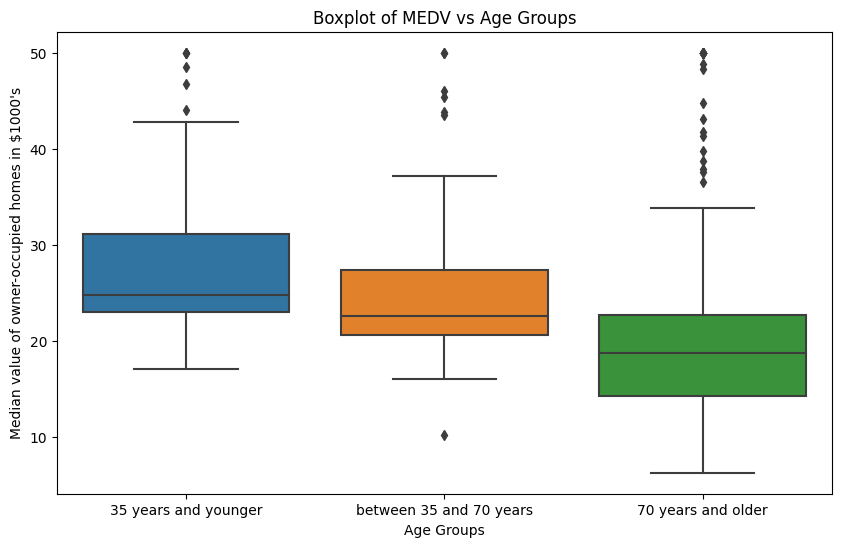

In [31]:
# Create age groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['Age Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Age Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs Age Groups')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.xlabel("Age Groups")
plt.show()


## Scatter Plot

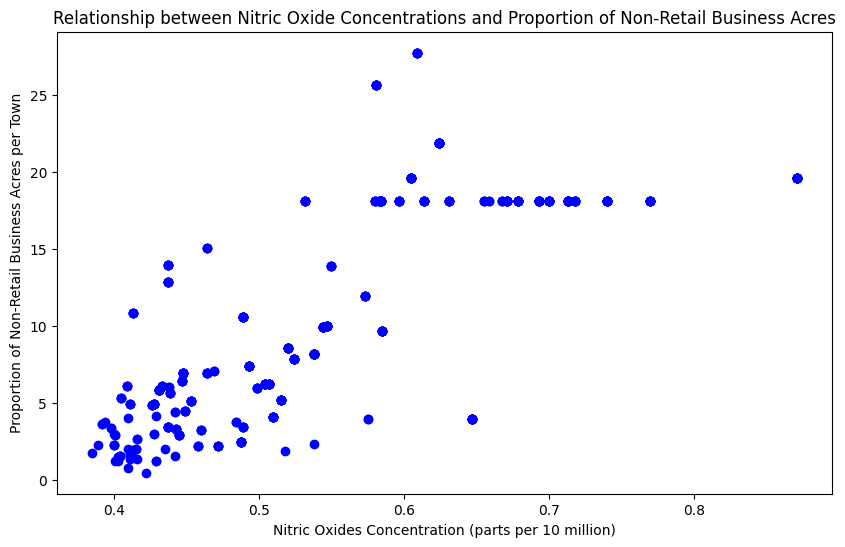

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], c='blue')
plt.title('Relationship between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxides Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()


## Histogram

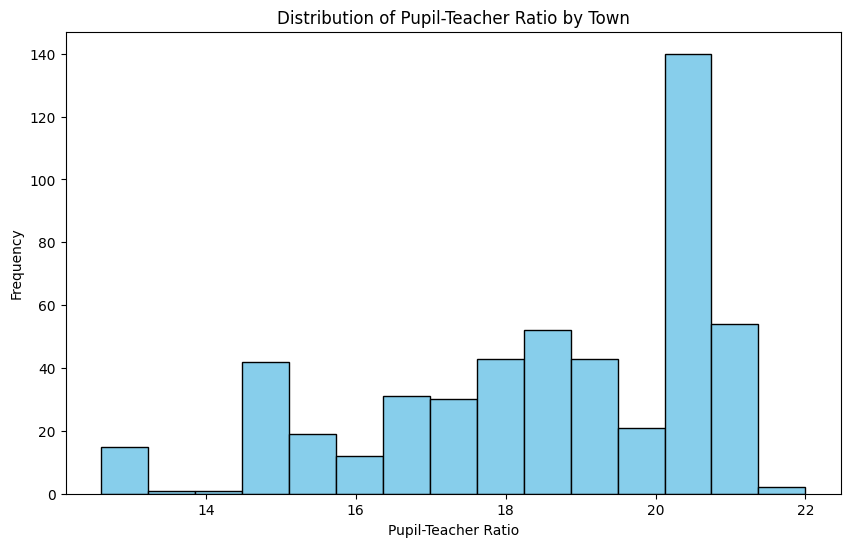

In [33]:
plt.figure(figsize=(10,6))
plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


# Task 5: Use the appropriate tests to answer the questions provided.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



In [34]:
from scipy import stats

# Separate the median values based on whether the tract bounds the Charles river
bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(bounded_by_river, not_bounded_by_river)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Conclusion based on a significance level, e.g., 0.05
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in median values between houses bounded and not bounded by the Charles river.")
else:
    print("There is no significant difference in median values between houses bounded and not bounded by the Charles river.")


t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05
There is a significant difference in median values between houses bounded and not bounded by the Charles river.


## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [36]:
import pandas as pd
import scipy.stats as stats

# Define the AGE categories
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Group the MEDV variable by the age_group
groups = [boston_df['MEDV'][boston_df['age_group'] == category] for category in boston_df['age_group'].cat.categories]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Print results
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Conclusion based on a significance level of 0.05
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in median values of houses based on the proportion of owner-occupied units built prior to 1940.")
else:
    print("There is no significant difference in median values of houses based on the proportion of owner-occupied units built prior to 1940.")


F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15
There is a significant difference in median values of houses based on the proportion of owner-occupied units built prior to 1940.


## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Pearson correlation coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98


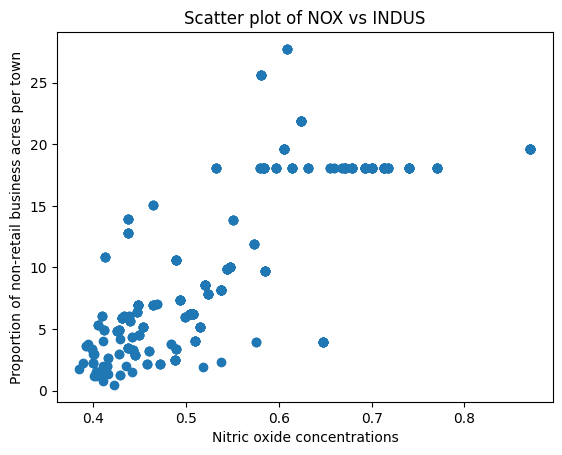

There is evidence of a significant linear relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.


In [39]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Create a scatter plot
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.xlabel('Nitric oxide concentrations')
plt.ylabel('Proportion of non-retail business acres per town')
plt.title('Scatter plot of NOX vs INDUS')
plt.show()

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is evidence of a significant linear relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("There is no evidence of a significant linear relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")


## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [40]:
import statsmodels.api as sm

# Add a constant term to the model (intercept)
X = sm.add_constant(boston_df['DIS'])

# Target variable
y = boston_df['MEDV']

# Create and fit the model
model = sm.OLS(y, X).fit()

# Print the summary statistics
print(model.summary())

# Extract the slope coefficient
slope_coefficient = model.params['DIS']

# Interpret the result
print(f"The estimated impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes is ${slope_coefficient * 1000} per unit distance.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        14:43:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0